In [1]:
!pip install nltk


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 #Read the data from the given excel file
testfile=pd.read_csv("Consumer_Complaints_test.csv")
trainfile=pd.read_csv("Consumer_Complaints_train.csv")

In [4]:
testfile.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [5]:
trainfile.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [6]:
print("DATA TYPES FOR TEST FILE")
print("\n",testfile.dtypes)
print("\nDATA TYPES FOR TRAIN FILE")
print("\n",trainfile.dtypes)

DATA TYPES FOR TEST FILE

 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

DATA TYPES FOR TRAIN FILE

 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         o

In [7]:
#checking for null values
testfile.isna().sum()

Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

In [8]:
trainfile.isna().sum()
# concating the tarin data and test data files
concated_df=pd.concat([trainfile,testfile],ignore_index=True)


In [9]:
#concated data frame or updated data frame
concated_df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [10]:
# MISSING VALUES ANALYSIS AND DROP THE COLUMNS WHERE MORE THAN 25% DATA IS MISSING 
missing_values=concated_df.isnull().sum() #count the number of missing values in each coloumn
missing_value_percentage=(missing_values/len(concated_df)*100)
# printing misssing values percentage
print("misssing values percentage")
print(missing_value_percentage)
#  DROP THE COLUMNS WHERE MORE THAN 25% DATA IS MISSING
columns_to_drop=missing_value_percentage[missing_value_percentage>25].index
print("\nTHE COLUMNS WHERE MORE THAN 25% DATA IS MISSING  ")
print("\n",columns_to_drop)

misssing values percentage
Date received                    0.000000
Product                          0.000000
Sub-product                     28.943221
Issue                            0.000000
Sub-issue                       61.165178
Consumer complaint narrative    84.303619
Company public response         81.106192
Company                          0.000000
State                            0.802440
ZIP code                         0.804321
Tags                            85.953020
Consumer consent provided?      71.680086
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?              25.000418
Complaint ID                     0.000000
dtype: float64

THE COLUMNS WHERE MORE THAN 25% DATA IS MISSING  

 Index(['Sub-product', 'Sub-issue', 'Consumer complaint narrative',
       'Company public response', 'Tags', 'Consumer consent provided?',
       'Co

In [11]:
concated_df.drop(columns=columns_to_drop,inplace=True)
#display the updated datframe
concated_df

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...
478411,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729
478412,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749
478413,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574
478414,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765


In [12]:
#EXTRACTING DAY MONTH AND YEAR FROM ADATE RECEVIED COLUMN AND CREATE A NEW FIELDS MONTH AND YEAR
concated_df["Date received"]=pd.to_datetime(concated_df["Date received"])
concated_df['month']=concated_df["Date received"].dt.month.fillna(0).astype(int)
concated_df['year']=concated_df["Date received"].dt.year.fillna(0).astype(int)
concated_df['day']=concated_df["Date received"].dt.day.fillna(0).astype(int)
concated_df.head(3)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,month,year,day
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,1605653,10,2015,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,1347613,4,2015,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,640394,12,2013,20


In [13]:
#calculate the number of days the complait was with the company and create field as "days held"
concated_df["Date sent to company"]=pd.to_datetime(concated_df["Date sent to company"])
concated_df["Days held"]=(concated_df["Date sent to company"]-concated_df["Date received"]).dt.days.fillna(0).astype(int)
concated_df.head(3)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,month,year,day,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,1605653,10,2015,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,1347613,4,2015,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,640394,12,2013,20,14


In [14]:
# DROPING THE DATE RECEIVED AND DATE SENT TO COMPANY ZIP CODE AND COMPLAINT ID
concated_df.drop(columns=["Date received","Date sent to company","ZIP code","Complaint ID"],axis=1,inplace=True)
concated_df.head(3)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,year,day,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,10,2015,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,4,2015,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,12,2013,20,14


In [15]:
# imputing null values in state by mode
mode_value=concated_df["State"].mode()[0]
concated_df["State"].fillna(mode_value,inplace=True)
concated_df.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,year,day,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,10,2015,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,4,2015,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,12,2013,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,3,2016,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,1,2015,30,0


In [16]:
# Ensure all date components are valid, then convert to datetime,
df=pd.DataFrame()


# Combine year, month, and day into a single string
df['date_str'] =concated_df['year'].astype(str) + '-' + concated_df['month'].astype(str) + '-' + concated_df['day'].astype(str)
# Convert to datetime, coercing errors to NaT
df['date'] = pd.to_datetime(df['date_str'], errors='coerce')

# Extract the ISO week number, replacing NaT with 0
df['Week_Received'] = df['date'].dt.isocalendar().week.fillna(0).astype(int)

concated_df['Week_Received']=df['Week_Received']
concated_df.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,year,day,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,10,2015,14,0,42
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,4,2015,26,0,17
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,12,2013,20,14,51
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,3,2016,3,1,9
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,1,2015,30,0,5


In [17]:
#add the consumer disputed column from traindataframe  to concated data frame
concated_df["Consumer disputed?"]=trainfile['Consumer disputed?']
concated_df #.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,year,day,Days held,Week_Received,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,10,2015,14,0,42,No
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,4,2015,26,0,17,Yes
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,12,2013,20,14,51,No
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,3,2016,3,1,9,No
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,1,2015,30,0,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478411,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2,2015,9,0,7,NaN
478412,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,11,2012,13,1,46,NaN
478413,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,5,2012,15,0,20,NaN
478414,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,6,2015,7,0,23,NaN


In [18]:
# store data of disputed people into the disputed cons variable for future tasks
disputed_cons=concated_df[concated_df["Consumer disputed?"]=="Yes"]
#diplay the data of disputed consumers
disputed_cons

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,year,day,Days held,Week_Received,Consumer disputed?
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,4,2015,26,0,17,Yes
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,1,2015,30,0,5,Yes
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,1,2014,10,5,2,Yes
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,12,2015,7,0,50,Yes
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,4,2012,5,0,14,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358787,Mortgage,Credit decision / Underwriting,JPMorgan Chase & Co.,CA,Postal mail,Closed with explanation,Yes,5,2014,30,5,22,Yes
358791,Mortgage,"Loan modification,collection,foreclosure",Bank of America,TX,Referral,Closed with explanation,Yes,8,2013,12,1,33,Yes
358797,Debt collection,Cont'd attempts collect debt not owed,"Convergent Resources, Inc.",IN,Web,Closed with explanation,Yes,6,2016,20,0,25,Yes
358798,Credit reporting,Incorrect information on credit report,Equifax,IL,Web,Closed with non-monetary relief,Yes,2,2013,26,0,9,Yes


Text(0, 0.5, 'count')

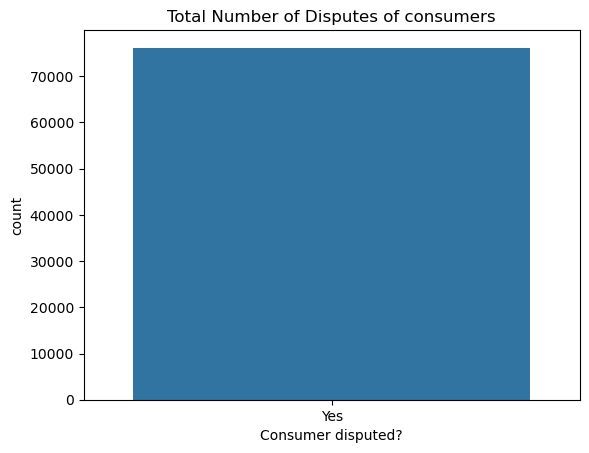

In [19]:
sns.barplot(x=disputed_cons["Consumer disputed?"],y=disputed_cons.index,estimator=len)
plt.title("Total Number of Disputes of consumers")
plt.ylabel("count")

Product
Mortgage                   28080
Debt collection            12776
Credit reporting           10806
Credit card                 9409
Bank account or service     8245
Consumer Loan               3324
Student loan                2395
Payday loan                  408
Money transfers              382
Prepaid card                 255
Other financial service       90
Virtual currency               2
Name: count, dtype: int64


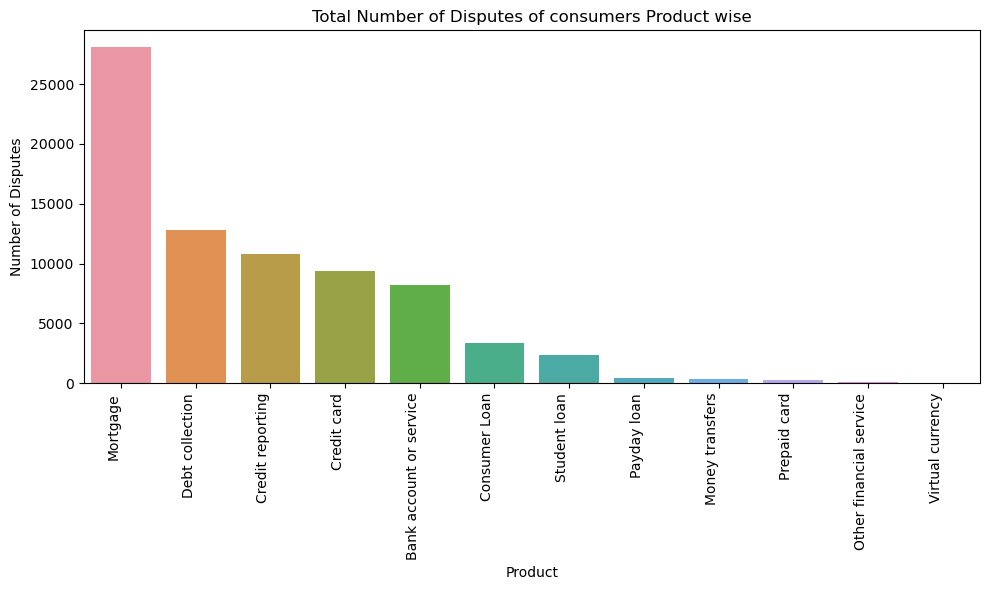

In [20]:
#Total number of consumer product wise dispute
disputed_by_product=disputed_cons["Product"].value_counts()
print(disputed_by_product)
plt.figure(figsize=(10,6))
sns.barplot(x=disputed_by_product.index,y=disputed_by_product.values)#hue=trainfile["Product"]
plt.title("Total Number of Disputes of consumers Product wise")
plt.ylabel("Number of Disputes")
plt.xticks(rotation=90,ha="right")
plt.tight_layout()
plt.show()

Issue
Loan modification,collection,foreclosure    13937
Loan servicing, payments, escrow account     9503
Incorrect information on credit report       7063
Cont'd attempts collect debt not owed        5223
Account opening, closing, or management      3804
                                            ...  
Overdraft, savings or rewards features          4
Lost or stolen money order                      4
Lender repossessed or sold the vehicle          3
Lender damaged or destroyed property            1
Lender sold the property                        1
Name: count, Length: 94, dtype: int64


Text(0.5, 0, 'Issues')

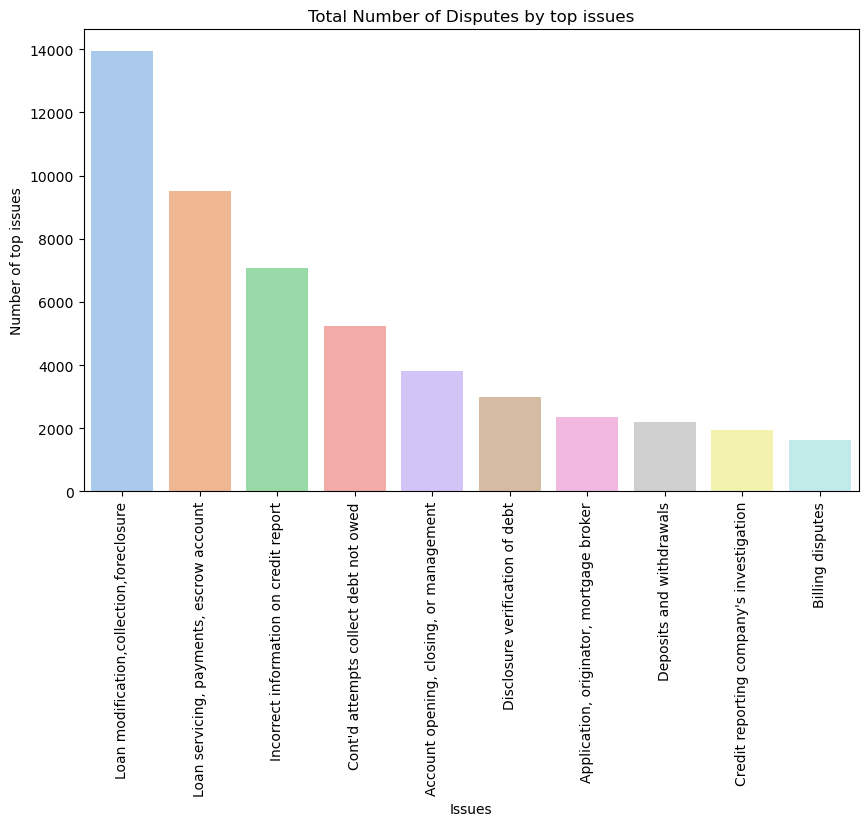

In [21]:
#Total number of disputes with top issues by highest disputes.
top_issues=disputed_cons["Issue"].value_counts()
ti=top_issues.head(10)
print(top_issues)
plt.figure(figsize=(10,6))
sns.barplot(x=ti.index,y=ti.values,palette="pastel")
plt.title("Total Number of Disputes by top issues")
plt.ylabel("Number of top issues")
plt.xticks(rotation=90)
plt.xlabel("Issues")

MAx disputes by state CA


Text(0.5, 0, 'States')

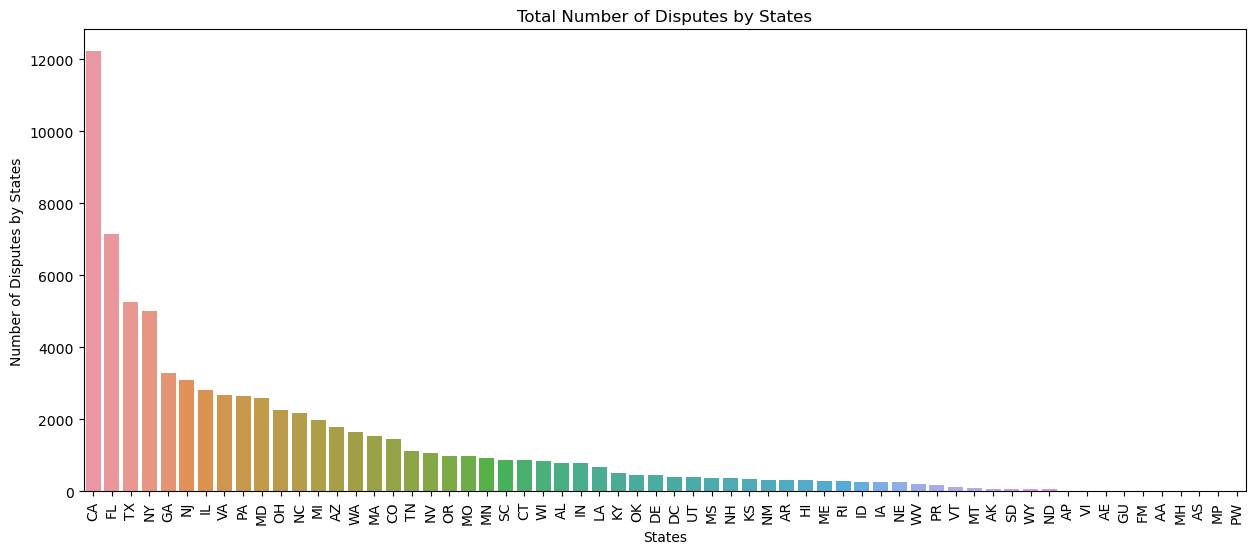

In [22]:
#Total number of disputes by state with maximum disputes
state_disputes=disputed_cons["State"].value_counts()
sd=state_disputes.idxmax()
print("MAx disputes by state",sd)
plt.figure(figsize=(15,6))
sns.barplot(x=state_disputes.index,y=state_disputes.values)
plt.title("Total Number of Disputes by States")
plt.ylabel("Number of Disputes by States")
plt.xticks(rotation=90)
plt.xlabel("States")

Submitted via
Web            55001
Referral       12066
Phone           4456
Postal mail     3497
Fax             1117
Email             35
Name: count, dtype: int64


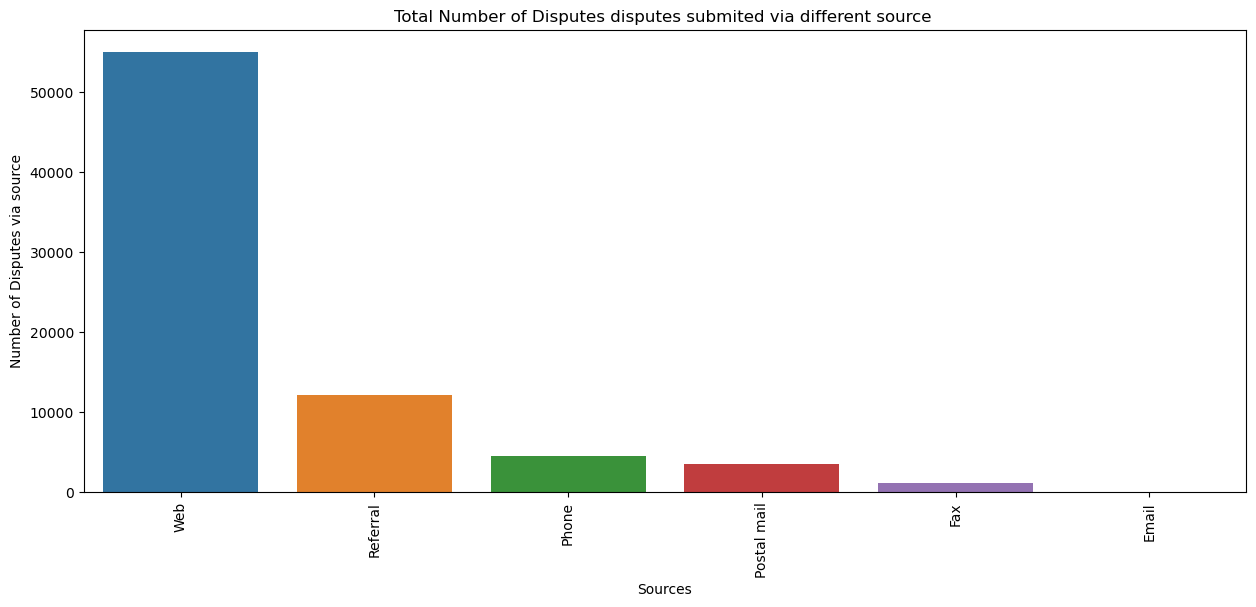

In [23]:
#Total number of disputes submited via different source
source_submited=disputed_cons['Submitted via'].value_counts()

plt.figure(figsize=(15,6))
sns.barplot(x=source_submited.index,y=source_submited.values)
plt.title("Total Number of Disputes disputes submited via different source ")
plt.ylabel("Number of Disputes via source")
plt.xticks(rotation=90)
plt.xlabel("Sources")

print(source_submited)

Company response to consumer
Closed with explanation            62108
Closed with non-monetary relief     5987
Closed with monetary relief         2864
Closed without relief               2859
Closed                              1928
Closed with relief                   426
Name: count, dtype: int64


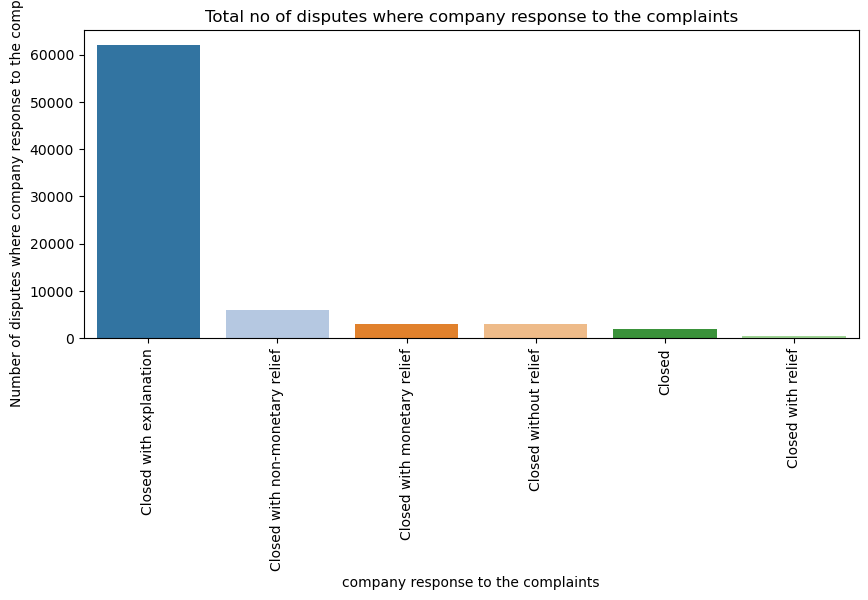

In [24]:
#Total no of disputes where company response to the complaints
company_response=disputed_cons["Company response to consumer"].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=company_response.index,y=company_response.values,palette="tab20")
plt.title("Total no of disputes where company response to the complaints")
plt.ylabel("Number of disputes where company response to the complaints")
plt.xticks(rotation=90)
plt.xlabel("company response to the complaints")
print(company_response)

Company response to consumer
Closed with explanation            62108
Closed with non-monetary relief     5987
Closed with monetary relief         2864
Closed without relief               2859
Closed                              1928
Closed with relief                   426
Name: count, dtype: int64


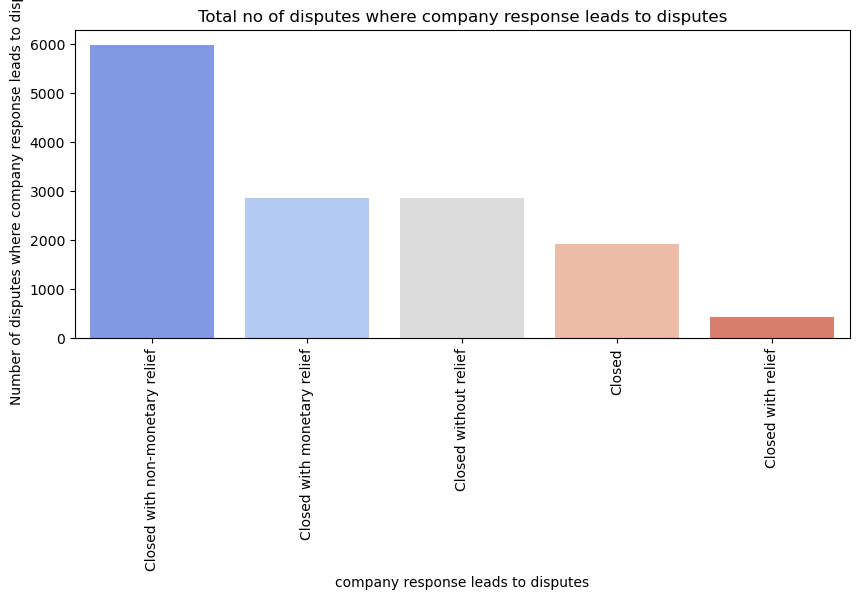

In [25]:
#Total number of disputes where the company response lead to disputes.  
company_response_leads_to_disputes=disputed_cons[disputed_cons["Company response to consumer"]!="Closed with explanation"]
cr=company_response_leads_to_disputes["Company response to consumer"].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=cr.index,y=cr.values,palette="coolwarm")
plt.title("Total no of disputes where company response leads to disputes")
plt.ylabel("Number of disputes where company response leads to disputes")
plt.xticks(rotation=90)
plt.xlabel("company response leads to disputes")
print(company_response)

Timely response?
Yes    74943
No      1229
Name: count, dtype: int64


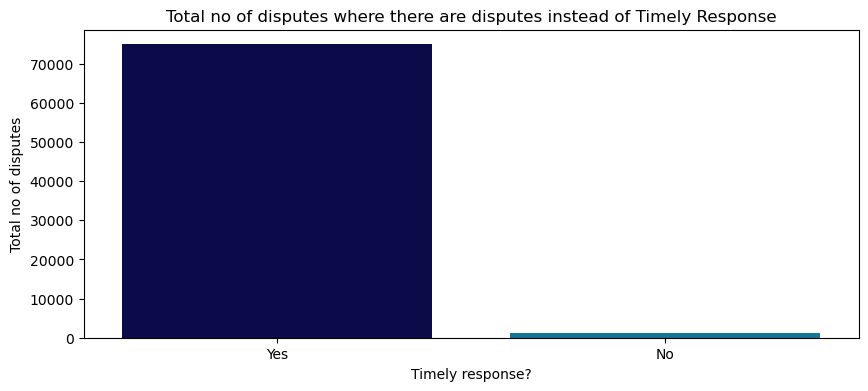

In [26]:
#Total number of disputes whether there are disputes instead of Timely Response

Timely_Response=disputed_cons["Timely response?"].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=Timely_Response.index,y=Timely_Response.values,palette="ocean")
plt.title("Total no of disputes where there are disputes instead of Timely Response")
plt.ylabel("Total no of disputes")


print(Timely_Response)

year
2015    20580
2014    17814
2016    13987
2013    13615
2012     9830
2011      346
Name: count, dtype: int64


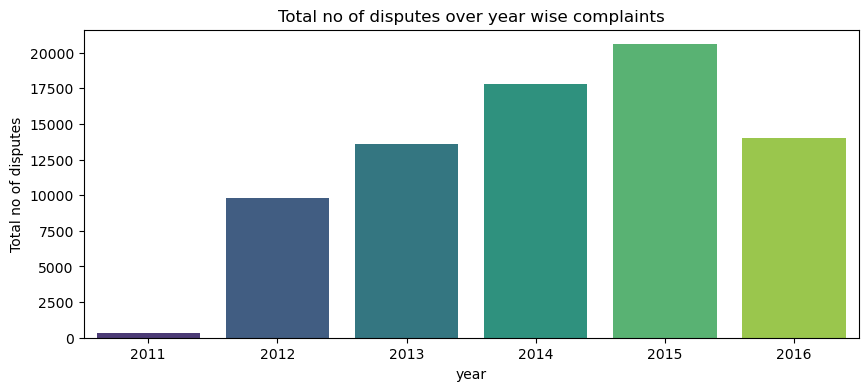

In [27]:
#Total no of disputes over year wise complaints
Year_wise_complaints=disputed_cons["year"].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=Year_wise_complaints.index,y=Year_wise_complaints.values,palette="viridis")
plt.title("Total no of disputes over year wise complaints")
plt.ylabel("Total no of disputes")


print(Year_wise_complaints)

year
2015    20580
2014    17814
2016    13987
2013    13615
2012     9830
2011      346
Name: count, dtype: int64


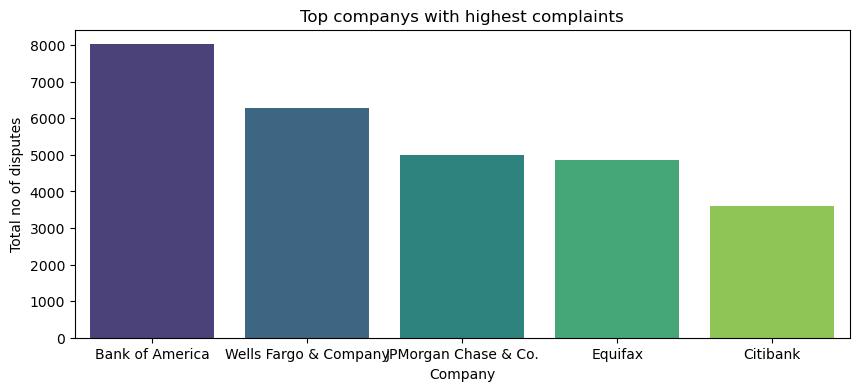

In [28]:
#Top companys with highest complaints
top_companys=disputed_cons["Company"].value_counts()
tc=top_companys.head(5)
plt.figure(figsize=(10,4))
sns.barplot(x=tc.index,y=tc.values,palette="viridis")
plt.title("Top companys with highest complaints")
plt.ylabel("Total no of disputes")


print(Year_wise_complaints)

In [29]:
#converting all negtive values in the Days held column to zero
concated_df['Days held']=concated_df['Days held'].clip(lower=0)
concated_df.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,year,day,Days held,Week_Received,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,10,2015,14,0,42,No
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,4,2015,26,0,17,Yes
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,12,2013,20,14,51,No
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,3,2016,3,1,9,No
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,1,2015,30,0,5,Yes


In [30]:
#droping the uneccesary columns like 'Company','State','Days held'
concated_df.drop(columns=['Company','State','Days held'],axis=1,inplace=True)


In [31]:
# Droping the week_received column
concated_df.drop(columns='Week_Received',axis=1,inplace=True)

In [32]:
#updated dataframe
concated_df

,Product,Issue,Submitted via,Company response to consumer,Timely response?,month,year,day,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,10,2015,14,No
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,4,2015,26,Yes
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,12,2013,20,No
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,3,2016,3,No
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1,2015,30,Yes
...,...,...,...,...,...,...,...,...,...
478411,Credit card,Credit determination,Web,Closed with explanation,Yes,2,2015,9,NaN
478412,Credit card,Balance transfer,Web,Closed with explanation,Yes,11,2012,13,NaN
478413,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed without relief,Yes,5,2012,15,NaN
478414,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,6,2015,7,NaN


In [33]:
#change the Consumer Disputed column 0 to 1(yes to 1 and no 0)
mapping={"Yes":1,"No":0}
concated_df['Consumer disputed?']=concated_df['Consumer disputed?'].map(mapping)
concated_df['Consumer disputed?']=concated_df['Consumer disputed?'].fillna(0).astype(int)
#updated dataframe
concated_df

,Product,Issue,Submitted via,Company response to consumer,Timely response?,month,year,day,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,10,2015,14,0
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,4,2015,26,1
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,12,2013,20,0
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,3,2016,3,0
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1,2015,30,1
...,...,...,...,...,...,...,...,...,...
478411,Credit card,Credit determination,Web,Closed with explanation,Yes,2,2015,9,0
478412,Credit card,Balance transfer,Web,Closed with explanation,Yes,11,2012,13,0
478413,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed without relief,Yes,5,2012,15,0
478414,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,6,2015,7,0


In [34]:
#updated dataframe
concated_df

,Product,Issue,Submitted via,Company response to consumer,Timely response?,month,year,day,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,10,2015,14,0
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,4,2015,26,1
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,12,2013,20,0
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,3,2016,3,0
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1,2015,30,1
...,...,...,...,...,...,...,...,...,...
478411,Credit card,Credit determination,Web,Closed with explanation,Yes,2,2015,9,0
478412,Credit card,Balance transfer,Web,Closed with explanation,Yes,11,2012,13,0
478413,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed without relief,Yes,5,2012,15,0
478414,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,6,2015,7,0


In [35]:
#Create Dummy variables  for categorical features and concat with orginal data frame
categorical_columns=['Product','Submitted via','Company response to consumer','Timely response?']
Dummy_variables=pd.get_dummies(concated_df[categorical_columns],drop_first=True)
Dummy_variables=Dummy_variables.astype(int)
#conacteing the dummie variables to concated_df data frame
concated_df=pd.concat([concated_df,Dummy_variables],axis=1)
concated_df.drop(columns=categorical_columns,inplace=True)
concated_df


,Issue,month,year,day,Consumer disputed?,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,Incorrect information on credit report,10,2015,14,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,Deposits and withdrawals,4,2015,26,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,Other,12,2013,20,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,Disclosure verification of debt,3,2016,3,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4,Disclosure verification of debt,1,2015,30,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478411,Credit determination,2,2015,9,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
478412,Balance transfer,11,2012,13,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
478413,"Loan modification,collection,foreclosure",5,2012,15,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
478414,Incorrect information on credit report,6,2015,7,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [36]:
#Scaleing the data set
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc=StandardScaler()
#x is independent variables y is dependent variables
x=concated_df.drop(columns='Consumer disputed?') #independent variables
y=concated_df["Consumer disputed?"] #dependent variables
#Encodeing the dataset by using label encoder
label_encoder=LabelEncoder()
x['Issue']=label_encoder.fit_transform(x["Issue"])

#Scaleing the independent variables by useing Standard Scaler
sc=StandardScaler()
x=sc.fit_transform(x)



In [37]:
#scaled data
x

array([[ 0.231193  ,  1.1479707 ,  0.64391324, ..., -0.09392915,
        -0.17454833,  0.13158828],
       [-0.3502472 , -0.64106736,  0.64391324, ..., -0.09392915,
        -0.17454833,  0.13158828],
       [ 0.94681171,  1.74431673, -0.93374963, ..., -0.09392915,
        -0.17454833,  0.13158828],
       ...,
       [ 0.54427618, -0.34289435, -1.72258106, ..., -0.09392915,
         5.72907229,  0.13158828],
       [ 0.231193  , -0.04472134,  0.64391324, ..., -0.09392915,
        -0.17454833,  0.13158828],
       [-0.97641357, -0.93924037,  0.64391324, ..., -0.09392915,
        -0.17454833,  0.13158828]])

In [38]:
#perfrom pca(principal component analyisis) to reduce diemensionaity while retaianing 80% of the infromation
from sklearn.decomposition import PCA

pca=PCA(n_components=0.8) #taking the 80% of information
x_pca=pca.fit_transform(x)

pca_df=pd.DataFrame(x_pca,columns=[f"pc{i}"for i in range(1,pca.n_components_+1)])


#printing the number of prinicipal components selected
#print("number of prinicipal components selected",pca.n_components_)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
0,-1.407577,-0.622271,1.232220,0.120437,0.613583,-0.950658,-0.695825,0.277518,-0.127733,0.006559,-0.084322,-0.233188,0.231869,-0.032087,-0.324317,0.210353,0.135528
1,-0.989518,-0.705364,-0.344777,-0.292822,0.170341,-0.190802,0.695998,-0.135701,-0.056243,-0.043464,-0.166910,-0.238036,0.103811,0.312791,0.673435,-0.885041,0.118458
2,1.047523,3.093335,-0.152018,1.330193,0.727135,1.411452,-2.621881,-0.756806,-0.590364,-0.040741,-0.729358,-0.267677,0.681441,0.143941,0.239606,-0.513209,0.258952
3,0.160989,-0.836053,-1.159556,1.923233,-1.040993,0.555740,1.927913,0.475355,0.732324,-0.680216,-0.353502,-0.006365,-0.189434,-0.523767,-0.908236,1.498148,0.079581
4,-1.755029,-0.785529,-1.126907,0.235630,-1.021521,0.449459,1.185533,-0.202445,0.315908,-0.098792,-0.390975,-0.357291,-0.344634,0.376419,1.077143,-1.224048,0.142234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478411,-0.985131,0.273102,-1.439859,-0.373127,1.166668,-1.263835,1.224601,-0.890985,0.369838,0.586219,-0.273397,-0.105101,-0.499534,-0.240907,-0.150220,0.478885,0.165428
478412,-0.141833,0.819900,-2.041017,-0.684889,0.840676,-2.082646,-1.717723,0.271405,0.236111,0.203671,-0.244136,-0.135144,-0.174831,-0.140136,-0.119181,0.122073,0.455764
478413,4.464896,1.783684,0.437449,-1.673148,-2.330652,0.058045,0.756888,-1.516478,-0.509396,-0.405403,1.491584,0.255122,-1.036875,-0.444572,0.547815,0.047422,0.860975
478414,-1.442770,-0.611463,1.276891,0.124726,0.543609,-0.880788,0.163608,-0.352221,-0.081622,0.183920,-0.040300,-0.140148,0.030369,-0.234085,-0.630795,0.755923,-0.039640


In [39]:
print("number of prinicipal components selected",pca.n_components_)
#concating the target variable to pc dataframe
pca_df["Consumer disputed?"]=y.reset_index(drop=True)
pca_df

number of prinicipal components selected 17


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,Consumer disputed?
0,-1.407577,-0.622271,1.232220,0.120437,0.613583,-0.950658,-0.695825,0.277518,-0.127733,0.006559,-0.084322,-0.233188,0.231869,-0.032087,-0.324317,0.210353,0.135528,0
1,-0.989518,-0.705364,-0.344777,-0.292822,0.170341,-0.190802,0.695998,-0.135701,-0.056243,-0.043464,-0.166910,-0.238036,0.103811,0.312791,0.673435,-0.885041,0.118458,1
2,1.047523,3.093335,-0.152018,1.330193,0.727135,1.411452,-2.621881,-0.756806,-0.590364,-0.040741,-0.729358,-0.267677,0.681441,0.143941,0.239606,-0.513209,0.258952,0
3,0.160989,-0.836053,-1.159556,1.923233,-1.040993,0.555740,1.927913,0.475355,0.732324,-0.680216,-0.353502,-0.006365,-0.189434,-0.523767,-0.908236,1.498148,0.079581,0
4,-1.755029,-0.785529,-1.126907,0.235630,-1.021521,0.449459,1.185533,-0.202445,0.315908,-0.098792,-0.390975,-0.357291,-0.344634,0.376419,1.077143,-1.224048,0.142234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478411,-0.985131,0.273102,-1.439859,-0.373127,1.166668,-1.263835,1.224601,-0.890985,0.369838,0.586219,-0.273397,-0.105101,-0.499534,-0.240907,-0.150220,0.478885,0.165428,0
478412,-0.141833,0.819900,-2.041017,-0.684889,0.840676,-2.082646,-1.717723,0.271405,0.236111,0.203671,-0.244136,-0.135144,-0.174831,-0.140136,-0.119181,0.122073,0.455764,0
478413,4.464896,1.783684,0.437449,-1.673148,-2.330652,0.058045,0.756888,-1.516478,-0.509396,-0.405403,1.491584,0.255122,-1.036875,-0.444572,0.547815,0.047422,0.860975,0
478414,-1.442770,-0.611463,1.276891,0.124726,0.543609,-0.880788,0.163608,-0.352221,-0.081622,0.183920,-0.040300,-0.140148,0.030369,-0.234085,-0.630795,0.755923,-0.039640,0


In [40]:
#extracting independent variable from daset
xd=pca_df.drop(columns="Consumer disputed?",axis=1)
#extracting dependent variable from daset
yd=pca_df["Consumer disputed?"]


In [41]:
# Splitting the Data sets into x and y by the independent 
#and dependent variables selected by pca(principal component analyisis)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(xd,yd,test_size=0.2,random_state=42)

In [42]:
X_train.shape

(382732, 17)

In [43]:
#Building given models and measure their test and validation score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [44]:
# Building and training the logistic regression model
lm=LogisticRegression()
lm.fit(X_train,Y_train)

#predictions on training and testing data sets
logistic_Regression_train=lm.predict(X_train)
logistic_Regression_test=lm.predict(X_test)

#calculating the accuracy score
#printing the result for logistic Regresssion
print("Logistic Regression")
print("Training Accuracy :",accuracy_score(Y_train,logistic_Regression_train))
print("Testing Acuuracy :",accuracy_score(Y_test,logistic_Regression_test))

Logistic Regression
Training Accuracy : 0.8402354650251351
Testing Acuuracy : 0.842972701810125


In [45]:
# Building and training the Desision tree classifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

#predictions on training and testing data sets
dp_train=dt.predict(X_train) #dp is decision tree predection
dp_test=dt.predict(X_test)
#calculating the accuracy score
#printing the result for Desision tree classifier
print(" Desision tree classifier")
print("Training Accuracy :",accuracy_score(Y_train,dp_train))
print("Testing Acuuracy :",accuracy_score(Y_test,dp_test))

 Desision tree classifier
Training Accuracy : 0.886173614957725
Testing Acuuracy : 0.808818611262071


In [46]:
# Building and training the Random Forest classifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
#predictions on training and testing data sets
rp_train=rf.predict(X_train)
rp_test=rf.predict(X_test)
#calculating the accuracy score for  Random Forest classifier
#printing the result for  Random Forest classifier
print("Random Forest classifier")
print("Training Accuracy :",accuracy_score(Y_train,rp_train))
print("Testing Acuuracy :",accuracy_score(Y_test,rp_test))

Random Forest classifier
Training Accuracy : 0.8861605509860686
Testing Acuuracy : 0.8216316207516409


In [47]:
# Building and training the Adaboost classifier
ab=AdaBoostClassifier()
ab.fit(X_train,Y_train)
#predictions on training and testing data sets
ab_train=ab.predict(X_train)
ab_test=ab.predict(X_test)
#calculating the accuracy score classifier
#printing the result for classifier
print(" Adaboost classifier")
print("Training Accuracy :",accuracy_score(Y_train,ab_train))
print("Testing Acuuracy :",accuracy_score(Y_test,ab_test))

 Adaboost classifier
Training Accuracy : 0.8402354650251351
Testing Acuuracy : 0.842972701810125


In [48]:
# Building and training the Gradient boost classifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
#predictions on training and testing data sets
gbc_train=gbc.predict(X_train)
gbc_test=gbc.predict(X_test)
#calculating the accuracy score Gradient boost classifier
#printing the result for Gradient boost classifier
print(" Gradient boost classifier")
print("Training Accuracy :",accuracy_score(Y_train,gbc_train))
print("Testing Acuuracy :",accuracy_score(Y_test,gbc_test))

 Gradient boost classifier
Training Accuracy : 0.8402354650251351
Testing Acuuracy : 0.842972701810125


In [49]:
# Building and training the XGB classifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
#predictions on training and testing data sets
xgb_train=xgb.predict(X_train)
xgb_test=xgb.predict(X_test)
#calculating the accuracy XGBclassifier
#printing the result for XGBclassifier
print(" XGBclassifier")
print("Training Accuracy :",accuracy_score(Y_train,xgb_train))
print("Testing Acuuracy :",accuracy_score(Y_test,xgb_test))

 XGBclassifier
Training Accuracy : 0.842704555668196
Testing Acuuracy : 0.8449270515446679


In [50]:
X_test

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
263733,-0.452813,1.727562,-1.003733,-0.889391,0.970902,0.707710,2.043234,1.302695,-0.962061,0.769311,0.245957,-0.251228,-0.418005,0.332181,1.050158,-1.181822,0.483601
358614,-0.042728,-1.378689,0.409609,-1.128881,-0.115044,0.144290,0.966723,-0.122532,-0.312459,0.546242,-0.181201,-0.424586,-0.153982,0.282727,0.563847,-0.819094,-0.045643
238593,-2.006235,-0.903823,-1.087212,0.361356,-0.819974,0.357711,0.556084,-0.041294,0.306533,0.129768,-0.188045,-0.004434,-0.705240,-0.476231,-0.656782,1.087919,-0.066398
340663,-0.511313,-0.216311,1.098730,-0.376544,0.284670,-1.298440,-1.883557,0.509456,-0.116599,-0.257206,-0.148435,-0.406731,0.503774,0.410266,0.494433,-1.030087,0.308910
415025,2.522481,-1.161079,0.208157,0.222338,-0.246218,-0.138257,-0.466553,1.590400,0.045733,-0.404961,-0.195373,-0.230880,0.373847,-0.248505,-0.865056,0.872799,0.196118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140141,-1.053620,-0.631794,-0.716553,-1.269210,0.392070,-1.048482,-0.208483,-1.209075,-2.014015,-3.747964,0.241435,2.171792,0.358172,0.101356,-0.926540,1.327639,-1.359766
81140,-1.167363,-0.478434,1.245412,-0.027876,0.388336,-0.916475,0.297244,-0.509510,-0.064261,0.099909,-0.104570,-0.262125,0.149523,0.071954,-0.000281,-0.084037,0.017863
236589,0.142822,-1.520863,0.891210,-1.419750,0.124583,0.230561,0.190095,-0.086534,-0.205197,0.752841,-0.001969,-0.146730,-0.496524,-0.404785,-0.887340,1.071251,-0.271191
6114,2.249327,1.718748,0.587743,-3.231828,-2.210688,0.005526,0.693244,-2.880119,-0.871490,0.597958,1.672073,0.307739,-1.748114,-0.493743,0.737541,-0.098539,0.526211


In [51]:
#printing all models accuracys for taking best model
print("Logistic Regression")
print("Training Accuracy :",accuracy_score(Y_train,logistic_Regression_train))
print("Testing Acuuracy :",accuracy_score(Y_test,logistic_Regression_test))

print("\nDesision tree classifier")
print("Training Accuracy :",accuracy_score(Y_train,dp_train))
print("Testing Acuuracy :",accuracy_score(Y_test,dp_test))

print("\nRandom Forest classifier")
print("Training Accuracy :",accuracy_score(Y_train,rp_train))
print("Testing Acuuracy :",accuracy_score(Y_test,rp_test))

print(" \nAdaboost classifier")
print("Training Accuracy :",accuracy_score(Y_train,ab_train))
print("Testing Acuuracy :",accuracy_score(Y_test,ab_test))

print(" \nGradient boost classifier")
print("Training Accuracy :",accuracy_score(Y_train,gbc_train))
print("Testing Acuuracy :",accuracy_score(Y_test,gbc_test))

print(" \nXGBclassifier")
print("Training Accuracy :",accuracy_score(Y_train,xgb_train))
print("Testing Acuuracy :",accuracy_score(Y_test,xgb_test))

Logistic Regression
Training Accuracy : 0.8402354650251351
Testing Acuuracy : 0.842972701810125

Desision tree classifier
Training Accuracy : 0.886173614957725
Testing Acuuracy : 0.808818611262071

Random Forest classifier
Training Accuracy : 0.8861605509860686
Testing Acuuracy : 0.8216316207516409
 
Adaboost classifier
Training Accuracy : 0.8402354650251351
Testing Acuuracy : 0.842972701810125
 
Gradient boost classifier
Training Accuracy : 0.8402354650251351
Testing Acuuracy : 0.842972701810125
 
XGBclassifier
Training Accuracy : 0.842704555668196
Testing Acuuracy : 0.8449270515446679


In [55]:
#Here we taking the most accurate results uses it and predicts
#the outcome for the test file and fills the dispute column so the bussines team take action acccordingly.
print("The best Model is XGBclassifier")
print("Training Accuracy :",accuracy_score(Y_train,xgb_train))
print("Testing Acuuracy :",accuracy_score(Y_test,xgb_test))
# Here we take the outcome of XGBclassifier model bescause it gives best accuracy,and storeing the results to X_test.
#so the bussines team take action acccordingly.

X_test["Consumer disputed?"]=xgb_test

The best Model is XGBclassifier
Training Accuracy : 0.842704555668196
Testing Acuuracy : 0.8449270515446679


In [64]:
#Saveing the updated test file with predicted outcomes
X_test.to_csv('predicted_test_file.csv',index=False)